array([[<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[target]'>],
       [<AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[target]'>]],
      dtype=object)

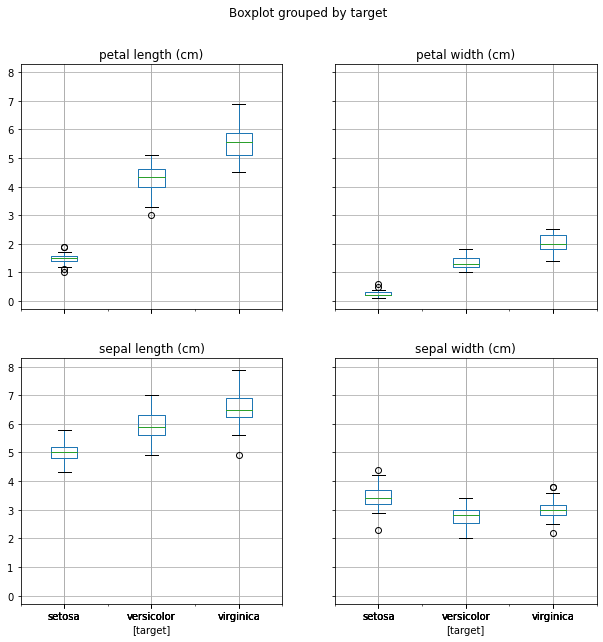

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
colors = ["blue", "red", "green"]
df = DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
)
target_mapping = {
    0: iris["target_names"][0],
    1: iris["target_names"][1],
    2: iris["target_names"][2],
}
df["target"] = df["target"].map(target_mapping)
X = df[iris["feature_names"]].to_numpy()
labels = df[["target"]].to_numpy()
df.boxplot(by="target", layout=(2, 2), figsize=(10, 10))


(1.0, 4.0)

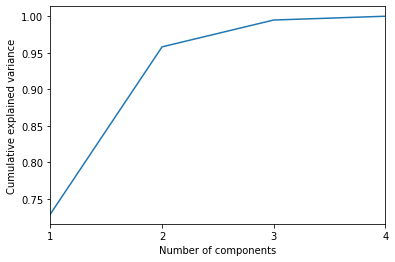

In [18]:
X = StandardScaler().fit_transform(X)

cov = (X.T @ X) / (X.shape[0] - 1)

eig_values, eig_vectors = np.linalg.eig(cov)

idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.clf()
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)
# plt.savefig("eig_cumsum.png")

In [27]:
eig_scores.shape

(150, 2)

i 0, u setosa
i 1, u versicolor
i 2, u virginica


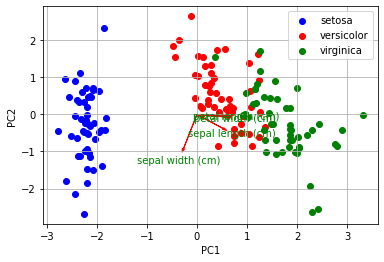

In [28]:
eig_scores = np.dot(X, sorted_eig_vectors[:, :2])
plt.clf()
def biplot(score, coeff, labels):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    for i, u in enumerate(iris["target_names"]):
        print(f"i {i}, u {u}")
        xi = [
            score[j, 0] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        yi = [
            score[j, 1] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        plt.scatter(xi, yi, c=colors[i], label=u)
    for i in range(n):
        plt.arrow(
            0, 0, coeff[i, 0], coeff[i, 1], color="r", head_width=0.05, head_length=0.1
        )
        plt.text(
            coeff[i, 0] * 1.35,
            coeff[i, 1] * 1.35,
            labels[i],
            color="g",
            ha="center",
            va="center",
        )


plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

biplot(eig_scores, sorted_eig_vectors, iris["feature_names"])
plt.legend()
# plt.savefig("biplot_eig.png")

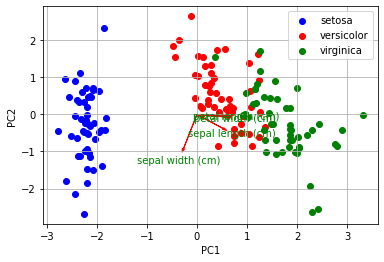

In [26]:
u, s, vh = np.linalg.svd(X)

plt.clf()
svd_scores = np.dot(X, vh.T[:, :2])

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

biplot(svd_scores, vh.T, iris["feature_names"])
plt.legend()
plt.savefig("biplot_svd.png")

In [11]:
df["target"] = df["target"].map(target_mapping)
X = df[iris["feature_names"]].to_numpy()
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3